## NumPy for Performance

### NumPy constructors

We saw previously that NumPy's core type is the `ndarray`, or N-Dimensional Array:

In [105]:
import numpy as np
np.zeros([3,4,2])

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

The real magic of numpy arrays is that most python operations are applied, quickly, on an elementwise basis:

In [130]:
x = np.arange(0,256,4).reshape(8,8)
x

array([[  0,   4,   8,  12,  16,  20,  24,  28],
       [ 32,  36,  40,  44,  48,  52,  56,  60],
       [ 64,  68,  72,  76,  80,  84,  88,  92],
       [ 96, 100, 104, 108, 112, 116, 120, 124],
       [128, 132, 136, 140, 144, 148, 152, 156],
       [160, 164, 168, 172, 176, 180, 184, 188],
       [192, 196, 200, 204, 208, 212, 216, 220],
       [224, 228, 232, 236, 240, 244, 248, 252]])

Numpy's mathematical functions also happen this way, and are said to be "vectorized" functions.

In [131]:
np.sqrt(x)

array([[  0.        ,   2.        ,   2.82842712,   3.46410162,
          4.        ,   4.47213595,   4.89897949,   5.29150262],
       [  5.65685425,   6.        ,   6.32455532,   6.63324958,
          6.92820323,   7.21110255,   7.48331477,   7.74596669],
       [  8.        ,   8.24621125,   8.48528137,   8.71779789,
          8.94427191,   9.16515139,   9.38083152,   9.59166305],
       [  9.79795897,  10.        ,  10.19803903,  10.39230485,
         10.58300524,  10.77032961,  10.95445115,  11.13552873],
       [ 11.3137085 ,  11.48912529,  11.66190379,  11.83215957,
         12.        ,  12.16552506,  12.32882801,  12.489996  ],
       [ 12.64911064,  12.80624847,  12.9614814 ,  13.11487705,
         13.26649916,  13.41640786,  13.56465997,  13.7113092 ],
       [ 13.85640646,  14.        ,  14.14213562,  14.28285686,
         14.4222051 ,  14.56021978,  14.69693846,  14.83239697],
       [ 14.96662955,  15.09966887,  15.23154621,  15.3622915 ,
         15.49193338,  15.6204993

Numpy contains many useful functions for creating matrices. In our earlier lectures we've seen `linspace` and `arange` for evenly spaced numbers.

In [132]:
np.linspace(0,10,21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

In [133]:
np.arange(0,10,0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

 Here's one for creating matrices like coordinates in a grid:

In [134]:
xmin=-1.5
ymin=-1.0
xmax=0.5
ymax=1.0
resolution=300
xstep=(xmax-xmin)/resolution
ystep=(ymax-ymin)/resolution

ymatrix, xmatrix=np.mgrid[ymin:ymax:ystep,xmin:xmax:xstep]

In [135]:
print ymatrix

[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-0.99333333 -0.99333333 -0.99333333 ..., -0.99333333 -0.99333333
  -0.99333333]
 [-0.98666667 -0.98666667 -0.98666667 ..., -0.98666667 -0.98666667
  -0.98666667]
 ..., 
 [ 0.98        0.98        0.98       ...,  0.98        0.98        0.98      ]
 [ 0.98666667  0.98666667  0.98666667 ...,  0.98666667  0.98666667
   0.98666667]
 [ 0.99333333  0.99333333  0.99333333 ...,  0.99333333  0.99333333
   0.99333333]]


We can add these together to make a grid containing the complex numbers we want to test for membership in the Mandelbrot set.

In [136]:
values=xmatrix+1j*ymatrix

In [137]:
print values

[[-1.50000000-1.j         -1.49333333-1.j         -1.48666667-1.j         ...,
   0.48000000-1.j          0.48666667-1.j          0.49333333-1.j        ]
 [-1.50000000-0.99333333j -1.49333333-0.99333333j -1.48666667-0.99333333j
  ...,  0.48000000-0.99333333j  0.48666667-0.99333333j
   0.49333333-0.99333333j]
 [-1.50000000-0.98666667j -1.49333333-0.98666667j -1.48666667-0.98666667j
  ...,  0.48000000-0.98666667j  0.48666667-0.98666667j
   0.49333333-0.98666667j]
 ..., 
 [-1.50000000+0.98j       -1.49333333+0.98j       -1.48666667+0.98j       ...,
   0.48000000+0.98j        0.48666667+0.98j        0.49333333+0.98j      ]
 [-1.50000000+0.98666667j -1.49333333+0.98666667j -1.48666667+0.98666667j
  ...,  0.48000000+0.98666667j  0.48666667+0.98666667j
   0.49333333+0.98666667j]
 [-1.50000000+0.99333333j -1.49333333+0.99333333j -1.48666667+0.99333333j
  ...,  0.48000000+0.99333333j  0.48666667+0.99333333j
   0.49333333+0.99333333j]]


### Arraywise Algorithms

We can use this to apply the mandelbrot algorithm to whole *ARRAYS*

In [138]:
z0=values
z1=z0*z0+values
z2=z1*z1+values
z3=z2*z2+values

In [139]:
print z3

[[ 24.06640625+20.75j        23.16610231+20.97899073j
   22.27540349+21.18465854j ...,  11.20523832 -1.88650846j
   11.57345330 -1.6076251j   11.94394738 -1.31225596j]
 [ 23.82102149+19.85687829j  22.94415031+20.09504528j
   22.07634812+20.31020645j ...,  10.93323949 -1.5275283j
   11.28531994 -1.24641067j  11.63928527 -0.94911594j]
 [ 23.56689029+18.98729242j  22.71312709+19.23410533j
   21.86791017+19.4582314j  ...,  10.65905064 -1.18433756j
   10.99529965 -0.90137318j  11.33305161 -0.60254144j]
 ..., 
 [ 23.30453709-18.14090998j  22.47355537-18.39585192j
   21.65061048-18.62842771j ...,  10.38305264 +0.85663867j
   10.70377437 +0.57220289j  11.02562928 +0.27221042j]
 [ 23.56689029-18.98729242j  22.71312709-19.23410533j
   21.86791017-19.4582314j  ...,  10.65905064 +1.18433756j
   10.99529965 +0.90137318j  11.33305161 +0.60254144j]
 [ 23.82102149-19.85687829j  22.94415031-20.09504528j
   22.07634812-20.31020645j ...,  10.93323949 +1.5275283j
   11.28531994 +1.24641067j  11.63928527 +

So can we just apply our `mandel1` function to the whole matrix?

In [140]:
def mandel1(position,limit=50):
    value=position
    while abs(value)<2:
        limit-=1
        value=value**2+position
        if limit<0:
            return 0
    return limit

In [141]:
mandel1(values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

No. The *logic* of our current routine would require stopping for some elements and not for others. 

We can ask numpy to **vectorise** our method for us:

In [142]:
mandel2=np.vectorize(mandel1)

In [143]:
data5=mandel2(values)

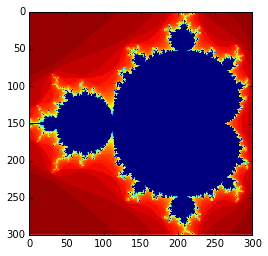

In [144]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data5,interpolation='none')

Is that any faster?

In [145]:
%%timeit
data5=mandel2(values)

1 loops, best of 3: 506 ms per loop


This is not significantly faster. When we use *vectorize* it's just hiding an plain old python for loop under the hood. We want to make the loop over matrix elements take place in the "**C Layer**".

What if we just apply the Mandelbrot algorithm without checking for divergence until the end:

In [146]:
def mandel_numpy_explode(position,limit=50):
    value=position
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2

        
    return abs(value)<2

In [147]:
data6=mandel_numpy_explode(values)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in square
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in square
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in absolute
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


OK, we need to prevent it from running off to $\infty$

In [148]:
def mandel_numpy(position,limit=50):
    value=position
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2
        # Avoid overflow
        value[diverging]=2
        
    return abs(value)<2

In [149]:
data6=mandel_numpy(values)

In [150]:
%%timeit

data6=mandel_numpy(values)

10 loops, best of 3: 65.3 ms per loop


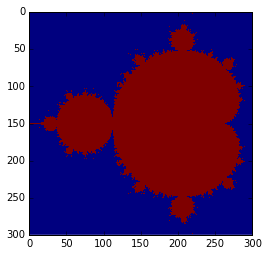

In [151]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data6,interpolation='none')

Wow, that was TEN TIMES faster.

There's quite a few NumPy tricks there, let's remind ourselves of how they work:

In [152]:
diverging=abs(z3)>2
z3[diverging]=2

When we apply a logical condition to a NumPy array, we get a logical array.

In [153]:
x=np.arange(10)*1.0
y=np.ones([10])*5
z=x>y
print z

[False False False False False False  True  True  True  True]


Logical arrays can be used to index into arrays:

In [154]:
x[x>80]

array([], dtype=float64)

In [155]:
x[np.logical_not(z)]

array([ 0.,  1.,  2.,  3.,  4.,  5.])

And you can use such an index as the target of an assignment:

In [156]:
x[z]=5
print x

[ 0.  1.  2.  3.  4.  5.  5.  5.  5.  5.]


Note that we didn't compare two arrays to get our logical array, but an array to a scalar integer -- this was broadcasting again.

### More Mandelbrot

Of course, we didn't calculate the number-of-iterations-to-diverge, just whether the point was in the set.

Let's correct our code to do that:


In [157]:
def mandel4(position,limit=50):
    value=position
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2
        first_diverged_this_time=np.logical_and(diverging, 
                                                diverged_at_count==0)
        diverged_at_count[first_diverged_this_time]=limit
        value[diverging]=2
        
    return diverged_at_count

In [158]:
data7=mandel4(values)

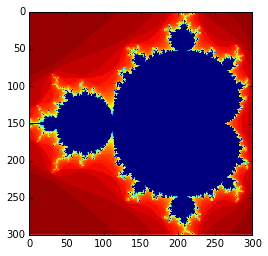

In [159]:
plt.imshow(data7,interpolation='none')

In [160]:
%%timeit

data7=mandel4(values)

1 loops, best of 3: 68 ms per loop


Note that here, all the looping over mandelbrot steps was in Python, but everything below the loop-over-positions happened in C. The code was amazingly quick compared to pure Python.

Can we do better by avoiding a square root?

In [161]:
def mandel5(position,limit=50):
    value=position
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=value*np.conj(value)>4
        first_diverged_this_time=np.logical_and(diverging, diverged_at_count==0)
        diverged_at_count[first_diverged_this_time]=limit
        value[diverging]=2
        
    return diverged_at_count

In [162]:
%%timeit

data8=mandel5(values)

10 loops, best of 3: 83.9 ms per loop


Probably not worth the time I spent thinking about it!

### NumPy Testing

Now, let's look at calculating those residuals, the differences between the different datasets.

In [163]:
data8=mandel5(values)
data5=mandel2(values)

In [164]:
np.sum((data8-data5)**2)

0.0

For our non-numpy datasets, numpy knows to turn them into arrays:

In [165]:
data1=[[mandel1(complex(x,y)) for x in xs] for y in ys]
sum(sum((data1-data7)**2))

0.0

But this doesn't work for pure non-numpy arrays

In [166]:
data2=[]
for y in ys:
    row=[]
    for x in xs:
        row.append(mandel1(complex(x,y)))
    data2.append(row)

In [167]:
data2-data1

TypeError: unsupported operand type(s) for -: 'list' and 'list'

So we have to convert to NumPy arrays explicitly:

In [ ]:
sum(sum((np.array(data2)-np.array(data1))**2))

NumPy provides some convenient assertions to help us write unit tests with NumPy arrays:

In [ ]:
x = [1e-5, 1e-3, 1e-1]
y = np.arccos(np.cos(x))
np.testing.assert_allclose(x, y, rtol=1e-6, atol=1e-20)

In [ ]:
np.testing.assert_allclose(data7, data1)

### Arraywise operations are fast

Note that we might worry that we carry on calculating the mandelbrot values for points that have already diverged.

In [ ]:
def mandel6(position,limit=50):
    value=np.zeros(position.shape)+position
    calculating=np.ones(position.shape,dtype='bool')
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value[calculating]=value[calculating]**2+position[calculating]
        diverging_now=np.zeros(position.shape,dtype='bool')
        diverging_now[calculating]=value[calculating
                                         ]*np.conj(value[calculating])>4
        calculating=np.logical_and(calculating,
                                   np.logical_not(diverging_now))
        diverged_at_count[diverging_now]=limit

        
    return diverged_at_count

In [ ]:
data8=mandel6(values)

In [ ]:
%%timeit

data8=mandel6(values)

In [ ]:
plt.imshow(data8,interpolation='none')

This was **not faster** even though it was **doing less work**

This often happens: on modern computers, **branches** (if statements, function calls) and **memory access** is usually the rate-determining step, not maths.

Complicating your logic to avoid calculations sometimes therefore slows you down. The only way to know is to **measure**

### Indexing with arrays

We've been using Boolean arrays a lot to get access to some elements of an array. We can also do this with integers:

In [168]:
x=np.arange(64)
y=x.reshape([8,8])
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [169]:
y[[0,5,2]]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [170]:
y[[0,2,5],[1,2,7]]

array([ 1, 18, 47])

We can use a : to indicate we want all the values from a particular axis:

In [171]:
y[0:8:2,[0,2]]

array([[ 0,  2],
       [16, 18],
       [32, 34],
       [48, 50]])

We can mix array selectors, boolean selectors, :s and ordinary array seqeuencers:

In [172]:
z=x.reshape([4,4,4])
print z

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]


In [173]:
z[:,[1,3],0:3]

array([[[ 4,  5,  6],
        [12, 13, 14]],

       [[20, 21, 22],
        [28, 29, 30]],

       [[36, 37, 38],
        [44, 45, 46]],

       [[52, 53, 54],
        [60, 61, 62]]])

We can manipulate shapes by adding new indices in selectors with np.newaxis:

In [174]:
z[:,np.newaxis,[1,3],0].shape

(4, 1, 2)

When we use basic indexing with integers and : expressions, we get a **view** on the matrix so a copy is avoided:

In [175]:
a=z[:,:,2]
a[0,0]=-500
z

array([[[   0,    1, -500,    3],
        [   4,    5,    6,    7],
        [   8,    9,   10,   11],
        [  12,   13,   14,   15]],

       [[  16,   17,   18,   19],
        [  20,   21,   22,   23],
        [  24,   25,   26,   27],
        [  28,   29,   30,   31]],

       [[  32,   33,   34,   35],
        [  36,   37,   38,   39],
        [  40,   41,   42,   43],
        [  44,   45,   46,   47]],

       [[  48,   49,   50,   51],
        [  52,   53,   54,   55],
        [  56,   57,   58,   59],
        [  60,   61,   62,   63]]])

We can also use ... to specify ": for as many as possible intervening axes":

In [176]:
z[1]

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [177]:
z[...,2]

array([[-500,    6,   10,   14],
       [  18,   22,   26,   30],
       [  34,   38,   42,   46],
       [  50,   54,   58,   62]])

However, boolean mask indexing and array filter indexing always causes a copy.

Let's try again at avoiding doing unnecessary work by using new arrays containing the reduced data instead of a mask:

In [178]:
def mandel7(position,limit=50):
    positions=np.zeros(position.shape)+position
    value=np.zeros(position.shape)+position
    indices=np.mgrid[0:values.shape[0],0:values.shape[1]]
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+positions
        diverging_now=value*np.conj(value)>4
        diverging_now_indices=indices[:,diverging_now]
        carry_on=np.logical_not(diverging_now)

        value=value[carry_on]
        indices=indices[:,carry_on]
        positions=positions[carry_on]
        diverged_at_count[diverging_now_indices[0,:],
                          diverging_now_indices[1,:]]=limit

    return diverged_at_count

In [179]:
data9=mandel7(values)

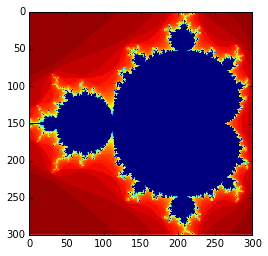

In [180]:
plt.imshow(data9,interpolation='none')

In [181]:
%%timeit

data9=mandel7(values)

10 loops, best of 3: 85.9 ms per loop


Still slower. Probably due to lots of copies -- the point here is that you need to *experiement* to see which optimisations will work. Performance programming needs to be empirical.